# Predicting the video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Requirements:
tensorflow==2.3.0
keras==2.4.3
scikit-learn==0.23.2


In [ ]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2

In [ ]:
#WORKING PROJECT
import numpy as np
import argparse
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os
import time
from keras.models import load_model
from collections import deque

def print_results(video, limit=None):
        #fig=plt.figure(figsize=(16, 30))
        if not os.path.exists('output'):
            os.mkdir('output')

        print("Loading model ...")
        model = load_model('/content/drive/MyDrive/Violence-Alert-System-main/Violence Detection/modelnew.h5')
        Q = deque(maxlen=128)
        vs = cv2.VideoCapture(video)
        writer = None
        (W, H) = (None, None)
        count = 0
        while True:
            # read the next frame from the file
            (grabbed, frame) = vs.read()

            # if the frame was not grabbed, then we have reached the end
            # of the stream
            if not grabbed:
                break

            # if the frame dimensions are empty, grab them
            if W is None or H is None:
                (H, W) = frame.shape[:2]

            # clone the output frame, then convert it from BGR to RGB
            # ordering, resize the frame to a fixed 128x128, and then
            # perform mean subtraction


            output = frame.copy()

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (128, 128)).astype("float32")
            frame = frame.reshape(128, 128, 3) / 255

            # make predictions on the frame and then update the predictions
            # queue
            preds = model.predict(np.expand_dims(frame, axis=0))[0]
#             print("preds",preds)
            Q.append(preds)

            # perform prediction averaging over the current history of
            # previous predictions
            results = np.array(Q).mean(axis=0)
            i = (preds > 0.50)[0]
            label = i

            text_color = (0, 255, 0) # default : green

            if label: # Violence prob
                text_color = (0, 0, 255) # red

            else:
                text_color = (0, 255, 0)

            text = "Violence: {}".format(label)
            FONT = cv2.FONT_HERSHEY_SIMPLEX

            cv2.putText(output, text, (35, 50), FONT,1.25, text_color, 3)

            # check if the video writer is None
            if writer is None:
                # initialize our video writer
                fourcc = cv2.VideoWriter_fourcc(*"MJPG")
                writer = cv2.VideoWriter("output/v_output.avi", fourcc, 30,(W, H), True)

            # write the output frame to disk
            writer.write(output)

            # show the output image
            cv2_imshow(output)
            key = cv2.waitKey(1) & 0xFF

            # if the `q` key was pressed, break from the loop
            if key == ord("q"):
                break
        # release the file pointersq
        print("[INFO] cleaning up...")
        writer.release()
        vs.release()

In [ ]:
V_path = "/V_103.mp4"
NV_path = "/content/drive/MyDrive/Violence-Alert-System-main/Violence Detection/Testing videos/nonv.mp4"

Loading model ...
1/1 [==============================] - 4s 4s/step


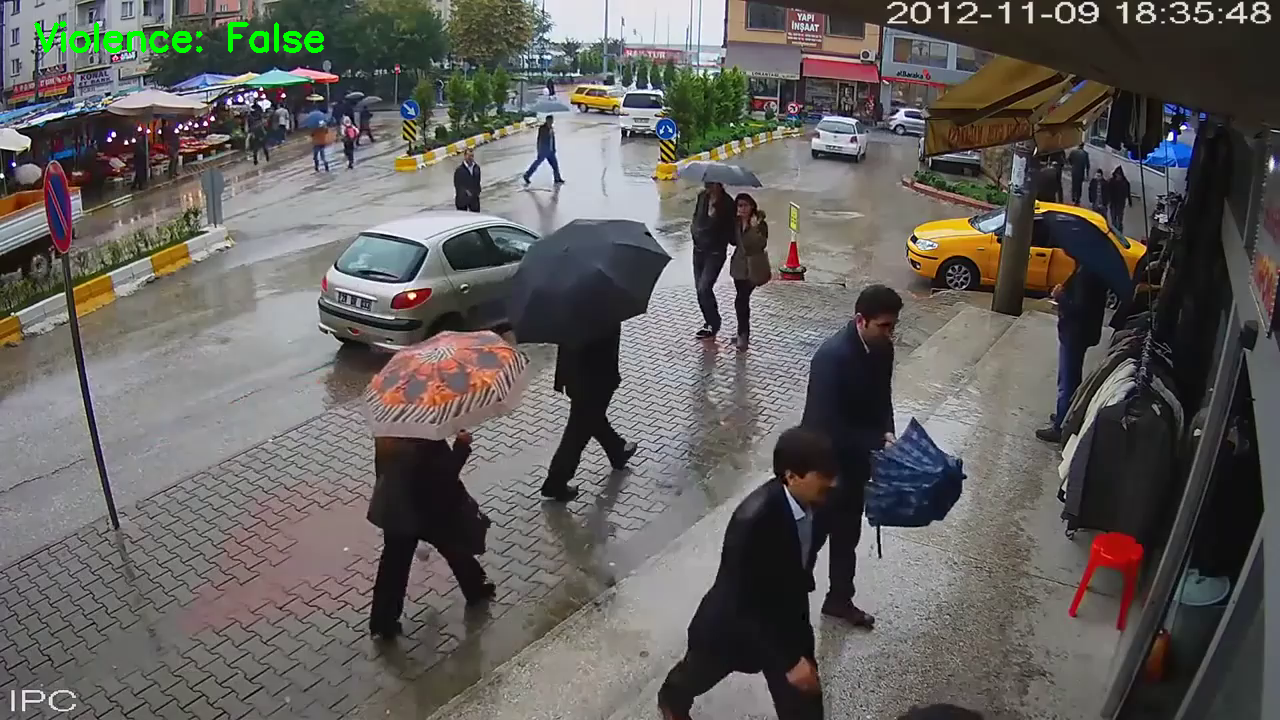

1/1 [==============================] - 0s 37ms/step


In [ ]:
print_results(NV_path)

# END